In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [11]:
# Load and preprocess CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

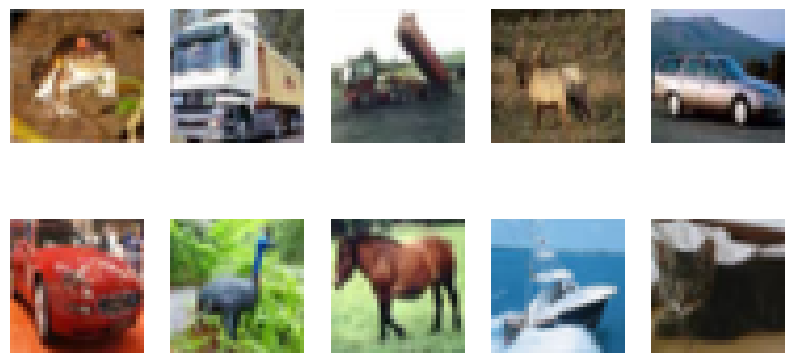

In [19]:
# Visualization of several examples from CIFAR-10
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()

In [12]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)
datagen.fit(x_train)

In [21]:
# model architecture
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.3),
    
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.4),
    
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [14]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Train the model with data augmentation
epochs = 50
batch_size = 64
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_test, y_test),
    verbose=1
)

Epoch 1/50


C:\Users\arian\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 62s 75ms/step - accuracy: 0.3363 - loss: 2.1351 - val_accuracy: 0.4705 - val_loss: 1.5493
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 75ms/step - accuracy: 0.5139 - loss: 1.3508 - val_accuracy: 0.4303 - val_loss: 2.0076
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 75ms/step - accuracy: 0.5725 - loss: 1.1898 - val_accuracy: 0.5902 - val_loss: 1.2237
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step - accuracy: 0.6025 - loss: 1.1093 - val_accuracy: 0.6858 - val_loss: 0.9093
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step - accuracy: 0.6305 - loss: 1.0466 - val_accuracy: 0.6595 - val_loss: 0.9937
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 75ms/step - accuracy: 0.6436 - loss: 1.0129 - val_accuracy: 0.5743 - val_loss: 1.2954
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step - accuracy: 0.6649 - loss: 0.9540 - val_accuracy: 0.7085 - val_loss: 0.8453
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 75ms/step - accuracy: 0.6794 - loss: 0.9154 - val_accurac

In [16]:
# Save the improved model
model.save('cifar10_improved_model_50.h5')
print("Improved model saved as 'cifar10_improved_model_50.h5'")

Improved model saved as 'cifar10_improved_model_50.h5'


In [17]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

313/313 - 4s - 11ms/step - accuracy: 0.8348 - loss: 0.4927
Test accuracy: 0.83


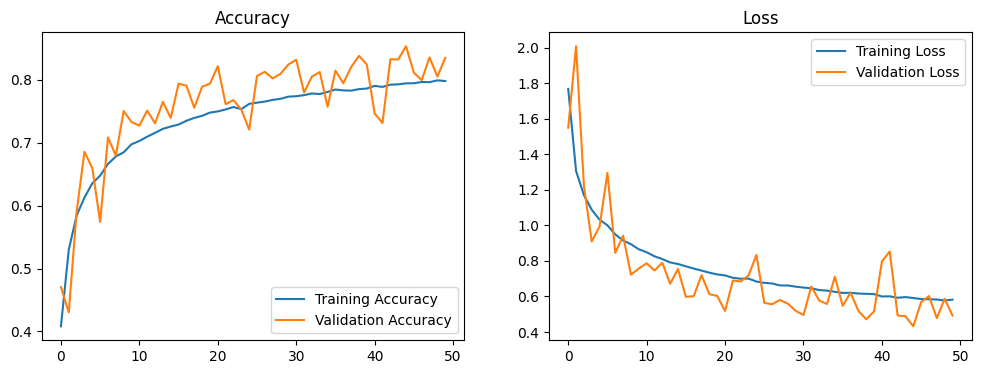

In [18]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()